# Лабораторная работа №2

В данной лабораторной работе необходимо реализовать и обучить свою версию логистической регрессии и SVM.

# LogisticRegression

Как мы все помним, логистическая функция потерь выглядит как:
$$
\mathcal{L}\left(X, y, w\right) = \sum_{i=1}^{l}log\left(1 + exp\left(-y_i (w^T, x_i)\right)\right) + \frac{\alpha}{2} \|w\|^2
$$

Выпишем шаг обновления $w$ для алгоритма градиентного спуска:
$$
w_{(i+1)} = w_{(i)} - \theta \nabla_{w} \mathcal{L}
$$

Соответственно, для корректной настройки весов модели $w$ необходимо вычислить $\nabla_w \mathcal{L}$.

В качестве критерия остановки можно выбрать один из:
* ${\|w_{(i)} - w_{(i-1)}\|}^2 \le \varepsilon$;
* ${\|\mathcal{L}\left(X, y, w_{(i)}\right) - \mathcal{L}\left(X, y, w_{(i-1)}\right)\|}^2 \le \varepsilon$.

Вам предлагается вычислить градиент $\nabla_w \mathcal{L}$ самостоятельно и приложить решение либо в виде фото, либо с помощью LaTex в ячейке ниже. 

![part1](misc/logloss_grad_sol.jpeg)
![part2](misc/logloss_grad_sol_2.jpeg)

После того, как вы решили задачу вычисления градиента, реализуйте алгоритм для модели логистической регрессии с помощью градиентного спуска. Шаблон кода представлен ниже.

In [1]:
from pathlib import Path
import pickle
import logging

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Проверка корректности работы алгоритма

Воспользуемся датасетом ```w8a``` из [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html). 

Этот датасет лежит в папке ```data``` (и тест, и трейн). Для считывания воспользуемся функцией ```sklearn.datasets.load_svmlight_file```.

In [2]:
from sklearn.datasets import load_svmlight_file

def load_data(filepath):    
    data, target = load_svmlight_file(filepath)
    data = data.toarray()
    return data, target
    
train_data, train_target = load_data("./data/w8a")
test_data, test_target = load_data("./data/w8a.t")

In [3]:
train_data.shape

(49749, 300)

Сравните работу вашего алгоритма с работой алгоритма, реализованного в библиотеке `sklearn` с помощью метрики `Accuracy`.

In [4]:
# Реализацию можно найти в соседнем файле
import importlib
import my_logreg
importlib.reload(my_logreg)
from my_logreg import CustomLogisticRegression

In [5]:
RANDOM_STATE = 648

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

sklearn_model = LogisticRegression(random_state=RANDOM_STATE)
my_model = CustomLogisticRegression(random_state=RANDOM_STATE)

In [7]:
%%time
sklearn_model.fit(train_data, train_target)

CPU times: user 3.51 s, sys: 49.2 ms, total: 3.56 s
Wall time: 2.56 s


LogisticRegression(random_state=648)

In [8]:
%%time
my_model.fit(train_data, train_target)

/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))


CPU times: user 1min 49s, sys: 11.3 s, total: 2min
Wall time: 1min 13s


CustomLogisticRegression(random_state=648)

In [9]:
sk_proba = sklearn_model.predict_proba(train_data)[:, 1]

In [10]:
my_proba = my_model.predict_proba(train_data)[:, 1]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

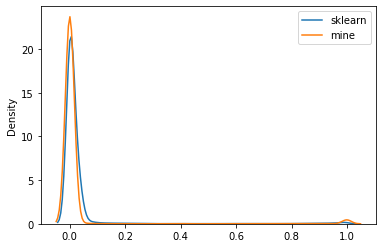

In [12]:
sns.kdeplot(sk_proba, label='sklearn')
sns.kdeplot(my_proba, label='mine')

plt.legend()

In [13]:
print('Similarity on train dataset via accuracy metric: ', 
      accuracy_score(my_model.predict(train_data), sklearn_model.predict(train_data)))
print('Similarity on test dataset via accuracy metric: ',
      accuracy_score(my_model.predict(test_data), sklearn_model.predict(test_data)))
print()
print('Accuracy on train dataset:')
print('Constant "-1": ', accuracy_score(train_target, -np.ones_like(train_target)))
print('My model: ', accuracy_score(my_model.predict(train_data), train_target)),
print('sklearn model: ', accuracy_score(sklearn_model.predict(train_data), train_target))
print()
print('Accuracy on test_datasset: ')
print('Constant "-1": ', accuracy_score(test_target, -np.ones_like(test_target)))
print('My model: ', accuracy_score(my_model.predict(test_data), test_target)),
print('sklearn model: ', accuracy_score(sklearn_model.predict(test_data), test_target))

Similarity on train dataset via accuracy metric:  0.9974873866811393
Similarity on test dataset via accuracy metric:  0.9971239381981138

Accuracy on train dataset:
Constant "-1":  0.9702707592112404
My model:  0.9875977406581037
sklearn model:  0.9866127962371103

Accuracy on test_datasset: 
Constant "-1":  0.9696341381847368
My model:  0.9872249347869708
sklearn model:  0.9856865761487525


Perfomance on my model is almost equal with sklearn model (at least better than constant)

## Реализация ROC-AUC

* Реализуйте свою собственную функцию подсчета ROC-кривой. 
* Проверьте свою реализацию, сравнив её с реализацией из `sklearn`

**NB.** ROC-кривую лучше всего возвращать в виде двух массивов узлов:
* `fpr` - координаты по оси X;
* `tpr` - координаты по оси Y;

Тогда ROC-кривая строится вдоль узлов `(fpr[i], tpr[i])`.

In [14]:
y_true = test_target
y_pred = my_model.predict_proba(test_data)[:, 1]

In [15]:
from sklearn.metrics import roc_curve, auc

# Реализацию можно найти в соседнем файле
import custom_roc_auc
importlib.reload(custom_roc_auc)
from custom_roc_auc import custom_roc_curve, custom_auc

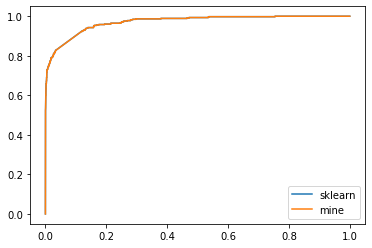

In [16]:
fpr, tpr, _ = roc_curve(test_target, my_model.predict_proba(test_data)[:, 1])
plt.plot(fpr, tpr, label='sklearn')

fpr, tpr = custom_roc_curve(test_target, my_model.predict_proba(test_data)[:, 1])
plt.plot(fpr, tpr, label='mine')

plt.legend()

In [17]:
y_pred = my_model.predict_proba(test_data)[:, 1]

In [18]:
%%time
fpr_sklearn, tpr_sklearn, _ = roc_curve(test_target, y_pred)
auc(fpr_sklearn, tpr_sklearn)

CPU times: user 7.62 ms, sys: 2 ms, total: 9.61 ms
Wall time: 8.26 ms


0.9711997985911713

In [19]:
%%time
fpr, tpr = custom_roc_curve(test_target, y_pred)
custom_auc(fpr, tpr)

CPU times: user 41.4 ms, sys: 11.5 ms, total: 52.9 ms
Wall time: 42.6 ms


0.9711286083243834

In [20]:
auc(fpr_sklearn, tpr_sklearn), custom_auc(fpr_sklearn, tpr_sklearn)

(0.9711997985911713, 0.9711997985911713)

In [21]:
fpr.shape, fpr_sklearn.shape

((11625,), (1647,))

Очень малая разница, возникшая из-за разных способов вычисления кривой (возможно в sklearn используется некоторое округление вероятностей). Сама auc функция работает также

## Визуализация

Постройте и объясните следующие графики зависимостей:
* Времени работы алгоритма от параметра `theta`;
* Качество работы алгоритма от параметра `alpha`;
* Постройте графики ROC-кривой от разных параметров `theta` и `alpha`.

In [22]:
param_grid = {'theta': [0.01, 0.03, 0.1, 0.3],
              'alpha': [0, 0.0001, 0.001, 0.1, 0.3, 0.5]}

In [23]:
import time

In [24]:
%%time
time_list = []
for theta in param_grid['theta']:
    start = time.time()
    my_logreg = CustomLogisticRegression(theta=theta)
    my_logreg.fit(train_data, train_target)
    end = time.time()
    time_list.append(end - start)

/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))
/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))
/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))
/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))


CPU times: user 6min 45s, sys: 1min 5s, total: 7min 51s
Wall time: 4min 3s


CPU times: user 31.6 ms, sys: 2.92 ms, total: 34.5 ms
Wall time: 24.1 ms


Text(0, 0.5, 'fit_time(sec)')

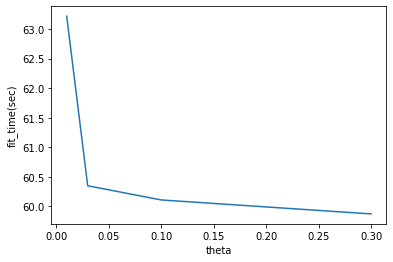

In [25]:
%%time
plt.plot(param_grid['theta'], time_list)

plt.xlabel('theta')
plt.ylabel('fit_time(sec)')

Время обучения особо не меняется видимо из-за того, что до критерия остановы алгоритм не доходит.

In [26]:
%%time
logreg_metrics_dict = {'train_acc': [],
                'test_acc': [],
                'train_rocauc': [],
                'test_rocauc': []}
for alpha in param_grid['alpha']:    
    my_logreg = CustomLogisticRegression(alpha=alpha)
    my_logreg.fit(train_data, train_target)
    train_pred = my_logreg.predict(train_data)
    train_proba = my_logreg.predict_proba(train_data)[:, 1]
    
    test_pred = my_logreg.predict(test_data)
    test_proba = my_logreg.predict_proba(test_data)[:, 1]
    
    logreg_metrics_dict['train_acc'].append(accuracy_score(train_target, train_pred))
    logreg_metrics_dict['test_acc'].append(accuracy_score(test_target, test_pred))
    
    try:
        logreg_metrics_dict['train_rocauc'].append(custom_auc(*custom_roc_curve(train_target, train_proba)))
        logreg_metrics_dict['test_rocauc'].append(custom_auc(*custom_roc_curve(test_target, test_proba)))
    except IndexError:
        logging.warning(f'With alpha=={alpha} error occured')
        logreg_metrics_dict['train_rocauc'].append(np.nan)
        logreg_metrics_dict['test_rocauc'].append(np.nan)

/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))
/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))
/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))
/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))
/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))
/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: Runtime

CPU times: user 10min 11s, sys: 1min 38s, total: 11min 49s
Wall time: 6min 1s


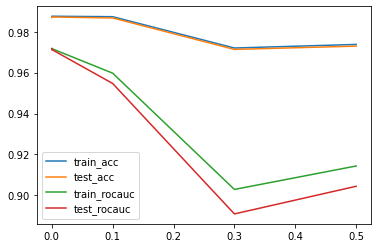

In [29]:
for metrics_name, metrics_plot in logreg_metrics_dict.items():
    plt.plot(param_grid['alpha'], metrics_plot, label=metrics_name)
plt.legend()

Точность на трейне и на тесте уменьшается с увеличением `alpha`

In [30]:
from sklearn.model_selection import ParameterGrid

In [31]:
misc_path = Path('misc')

In [32]:
%%time
# Cache results since it is quite time consuming
cache_path = misc_path.joinpath('gs_roc_curves.pkl')
if cache_path.exists():
    roc_dict = pickle.load(cache_path.open('rb'))
else:
    roc_dict = {}
    for params in ParameterGrid(param_grid):    
        my_logreg = CustomLogisticRegression(**params)
        my_logreg.fit(train_data, train_target)
        train_pred = my_logreg.predict(train_data)
        train_proba = my_logreg.predict_proba(train_data)[:, 1]

        test_pred = my_logreg.predict(test_data)
        test_proba = my_logreg.predict_proba(test_data)[:, 1]
        try:
            roc_dict[f'train, {str(params)}'] = custom_roc_curve(train_target, train_proba)
            roc_dict[f'test, {str(params)}'] = custom_roc_curve(test_target, test_proba)
        except:
            logging.warning(f'With alpha=={alpha} error occured')
    pickle.dump(roc_dict, cache_path.open('wb'))

CPU times: user 3.99 ms, sys: 18.2 ms, total: 22.2 ms
Wall time: 36.2 ms


In [48]:
auc_list = []
for label, (fpr, tpr) in roc_dict.items():
    auc_ = custom_auc(fpr, tpr)
    auc_list.append((label, auc_))
    print(label, auc_)

train, {'alpha': 0, 'theta': 0.01} 0.9718523147170868
test, {'alpha': 0, 'theta': 0.01} 0.9716920194038775
train, {'alpha': 0, 'theta': 0.03} 0.9686913205012513
test, {'alpha': 0, 'theta': 0.03} 0.9696794998005981
train, {'alpha': 0, 'theta': 0.1} 0.9647179347227328
test, {'alpha': 0, 'theta': 0.1} 0.9667107802314584
train, {'alpha': 0, 'theta': 0.3} 0.9599668138708937
test, {'alpha': 0, 'theta': 0.3} 0.95982330819454
train, {'alpha': 0.0001, 'theta': 0.01} 0.9715712782714956
test, {'alpha': 0.0001, 'theta': 0.01} 0.9711286083243834
train, {'alpha': 0.0001, 'theta': 0.03} 0.9632633853944589
test, {'alpha': 0.0001, 'theta': 0.03} 0.962506819938844
train, {'alpha': 0.0001, 'theta': 0.1} 0.9284387437264395
test, {'alpha': 0.0001, 'theta': 0.1} 0.9324481536181423
train, {'alpha': 0.0001, 'theta': 0.3} 0.9577451331636182
test, {'alpha': 0.0001, 'theta': 0.3} 0.9547152253926023
train, {'alpha': 0.001, 'theta': 0.01} 0.9716259296979972
test, {'alpha': 0.001, 'theta': 0.01} 0.9711470333894155


In [49]:
aucs_df = pd.DataFrame(auc_list, columns=['label', 'auc'])
# Drop noisy results
aucs_df = aucs_df[aucs_df.auc > 0]

In [50]:
best_worst_auc = pd.concat([aucs_df.sort_values('auc').head(), aucs_df.sort_values('auc').tail()])

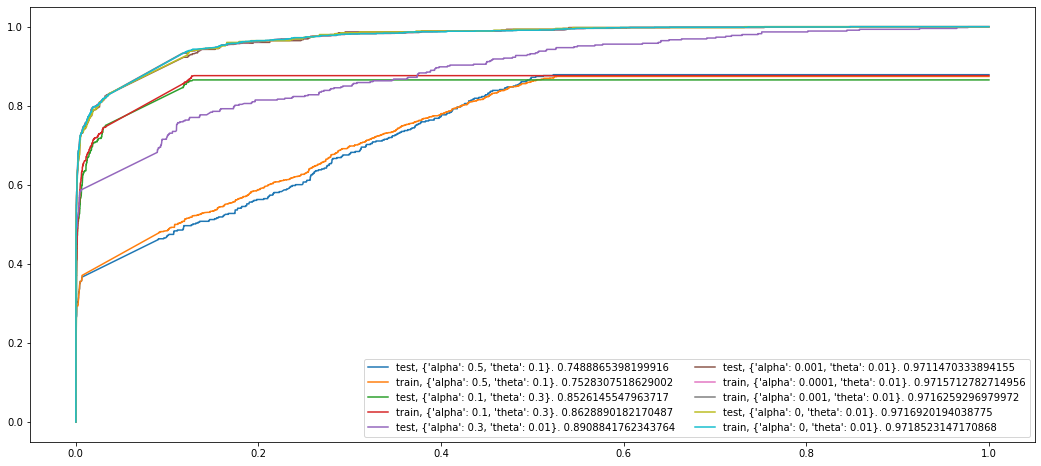

In [51]:
plt.figure(figsize=(18, 8))

for row in best_worst_auc.itertuples():
    label = row.label
    auc_ = row.auc
    (fpr, tpr) = roc_dict[label]
    plt.plot(fpr, tpr, label=label + f'. {str(auc_)}')
    
plt.legend(ncol=2)

Чем меньше `alpha`, тем лучше ROC AUC, как на трейне так и на тесте. Аналогично, чем меньше learning rate, тем лучше результат.

# SVM

Проделайте указанные выше упражнения (за исключением, подсчета градиента (посчитано на лекции) и реализации и построения ROC-кривой), но реализуйте SVM.

При реализации используйте [sklearn API](https://scikit-learn.org/stable/developers/develop.html) для классификатора. Параметры шага градиента и константы регуляризации возьмите аналогично.

In [52]:
# Реализацию можно найти в соседнем файле
import importlib
import my_svm
importlib.reload(my_svm)
from my_svm import CustomSVC

from sklearn.svm import SVC

## Проверка корректности

Сравнените с реализацией из `sklearn`.

In [53]:
my_svc = CustomSVC(max_iter=10_000,
                   random_state=RANDOM_STATE)
sklearn_svc = SVC(kernel='linear',
                  max_iter=10_000,
                  random_state=RANDOM_STATE)

In [54]:
%%time
my_svc.fit(train_data, train_target)

CPU times: user 5min 19s, sys: 5.85 s, total: 5min 25s
Wall time: 3min 23s


CustomSVC(max_iter=10000, random_state=648)

In [55]:
%%time
sklearn_svc.fit(train_data, train_target)

CPU times: user 39.9 s, sys: 819 ms, total: 40.7 s
Wall time: 42.8 s


/Users/aapiskotin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(kernel='linear', max_iter=10000, random_state=648)

In [56]:
print('Similarity on train dataset via accuracy metric: ', 
      accuracy_score(my_svc.predict(train_data), sklearn_svc.predict(train_data)))
print('Similarity on test dataset via accuracy metric: ',
      accuracy_score(my_svc.predict(test_data), sklearn_svc.predict(test_data)))
print()
print('Accuracy on train dataset:')
print('Constant "-1": ', accuracy_score(train_target, -np.ones_like(train_target)))
print('My model: ', accuracy_score(my_svc.predict(train_data), train_target)),
print('sklearn model: ', accuracy_score(sklearn_svc.predict(train_data), train_target))
print()
print('Accuracy on test_datasset: ')
print('Constant "-1": ', accuracy_score(test_target, -np.ones_like(test_target)))
print('My model: ', accuracy_score(my_svc.predict(test_data), test_target)),
print('sklearn model: ', accuracy_score(sklearn_svc.predict(test_data), test_target))

Similarity on train dataset via accuracy metric:  0.9805825242718447
Similarity on test dataset via accuracy metric:  0.9812052705504648

Accuracy on train dataset:
Constant "-1":  0.9702707592112404
My model:  0.9711551990994793
sklearn model:  0.987195722527086

Accuracy on test_datasset: 
Constant "-1":  0.9696341381847368
My model:  0.9709718413484048
sklearn model:  0.9866898535215036


Чуть лучше константы, что уже не так плохо) Возможно при увеличении количества итераций, можем получить результат лучше

## Визуализация

Постройте и объясните следующие графики зависимостей:
* Времени работы алгоритма от параметра `theta`;
* Качество работы алгоритма от параметра `alpha`.

In [57]:
param_grid = {'theta': [0.01, 0.03, 0.1, 0.3],
              'C': [1.0, 0.9, 0.7, 0.5, 0.3]}

In [58]:
%%time
time_list = []
for theta in param_grid['theta']:
    start = time.time()
    my_logreg = CustomSVC(theta=theta)
    my_logreg.fit(train_data, train_target)
    end = time.time()
    time_list.append(end - start)

CPU times: user 2min 5s, sys: 2.11 s, total: 2min 8s
Wall time: 1min 18s


CPU times: user 40.4 ms, sys: 6.55 ms, total: 47 ms
Wall time: 29.3 ms


Text(0, 0.5, 'fit_time(sec)')

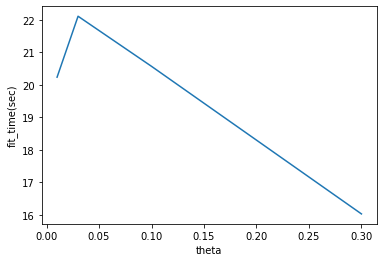

In [59]:
%%time
plt.plot(param_grid['theta'], time_list)

plt.xlabel('theta')
plt.ylabel('fit_time(sec)')

Кажется время обучения линейной уменьшается с увеличение `theta`.

In [60]:
%%time
metrics_dict = {'train_acc': [],
                'test_acc': []}
for C in param_grid['C']:    
    my_svc = CustomSVC(C=C)
    my_svc.fit(train_data, train_target)
    
    train_pred = my_svc.predict(train_data)
    test_pred = my_svc.predict(test_data)
    
    metrics_dict['train_acc'].append(accuracy_score(train_target, train_pred))
    metrics_dict['test_acc'].append(accuracy_score(test_target, test_pred))

CPU times: user 2min 36s, sys: 2.48 s, total: 2min 38s
Wall time: 1min 30s


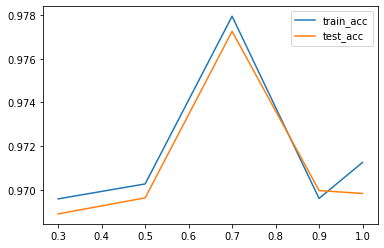

In [61]:
for metrics_name, metrics_plot in metrics_dict.items():
    plt.plot(param_grid['C'], metrics_plot, label=metrics_name)
plt.legend()

Качество работы модели не сильно меняется при изменении коэффициента `alpha`(`C`). Уверенно можно сказать, что разрыв между качеством на трейне и на тесте уменьшается.

# Сравнение алгоритмов

Сравните работу алгоритмов SVM и LogisticRegression на примере датасета `w8a`.

In [62]:
my_svc = CustomSVC(max_iter=10_000,
                   random_state=RANDOM_STATE)
my_logreg = CustomLogisticRegression(max_iter=10_000,
                                     random_state=RANDOM_STATE)

In [63]:
%%time
my_svc.fit(train_data, train_target)

CPU times: user 5min 17s, sys: 5.26 s, total: 5min 22s
Wall time: 3min 11s


CustomSVC(max_iter=10000, random_state=648)

In [64]:
%%time
my_logreg.fit(train_data, train_target)

/Users/aapiskotin/projects/x5_school_ml/homeworks/lab02/my_logreg.py:58: RuntimeWarning: overflow encountered in exp
  x_multipicator = -y / (1 + np.exp(y * np.dot(X, self.weights_)))


CPU times: user 1min 40s, sys: 18 s, total: 1min 58s
Wall time: 1min 26s


CustomLogisticRegression(random_state=648)

In [66]:
print('Similarity on train dataset via accuracy metric: ', 
      accuracy_score(my_svc.predict(train_data), my_logreg.predict(train_data)))
print('Similarity on test dataset via accuracy metric: ',
      accuracy_score(my_svc.predict(test_data), my_logreg.predict(test_data)))
print()
print('Accuracy on train dataset:')
print('Constant "-1": ', accuracy_score(train_target, -np.ones_like(train_target)))
print('My SVC: ', accuracy_score(my_svc.predict(train_data), train_target)),
print('My LogReg: ', accuracy_score(my_logreg.predict(train_data), train_target))
print()
print('Accuracy on test_datasset: ')
print('Constant "-1": ', accuracy_score(test_target, -np.ones_like(test_target)))
print('My SVC: ', accuracy_score(my_svc.predict(test_data), test_target)),
print('My LogReg: ', accuracy_score(my_logreg.predict(test_data), test_target))

Similarity on train dataset via accuracy metric:  0.9797784880098093
Similarity on test dataset via accuracy metric:  0.9801351080195305

Accuracy on train dataset:
Constant "-1":  0.9702707592112404
My SVC:  0.9711551990994793
My LogReg:  0.9875977406581037

Accuracy on test_datasset: 
Constant "-1":  0.9696341381847368
My SVC:  0.9709718413484048
My LogReg:  0.9872249347869708


"Из коробки" на данном датасете логрег работает лучше, чем SVC.